<a href="https://colab.research.google.com/github/pranaya-mathur/Deep-Learning-Projects/blob/master/Detecting%20Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-datasets/30764/39238/news-headlines-dataset-for-sarcasm-detection.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562311759&Signature=HcREaNW26a%2BSnH8u2CytHvWQMGXvttoZ94ncXPatyqQUu6AVwBhXDFnxpaUgXb6mMcAKBXeHfo%2BSu1QcDjVqhW8ElhzjN9GQsegsj8KGCI0RnM6UivrvicKVAZkaG22I9YeEwgTZqZ4ZMvl3cCwiForAtn0m%2FtjE8PeUUSrWtWEeaSbZTyJRXvivfcz1F3mkw4%2F08FNoZHaHYNVS94QgkknVGUQNn0AY%2Bux8E%2FOL5hRT7Xp6jhE1Sgt6Z%2BEVlqgS1rhyghqOiMnvg40M4sO86uURlkaPgpclCE3E4aXF7qbRVUuRyjhtW4PmlyiFnxlumJhwH%2BtSuSa18sKEI%2FL2Sw%3D%3D' --output 'news-headlines-dataset-for-sarcasm-detection.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1631k  100 1631k    0     0  2327k      0 --:--:-- --:--:-- --:--:-- 2324k


In [0]:
import zipfile
zip_ref = zipfile.ZipFile("news-headlines-dataset-for-sarcasm-detection.zip", 'r')
zip_ref.extractall("data")
zip_ref.close()

In [0]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
data = pd.read_json("data/Sarcasm_Headlines_Dataset.json",lines=True)

In [17]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0


In [18]:
sentences = data["headline"].values
sentences[:5]

array(["former versace store clerk sues over secret 'black code' for minority shoppers",
       "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
       "mom starting to fear son's web series closest thing she will have to grandchild",
       'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
       'j.k. rowling wishes snape happy birthday in the most magical way'],
      dtype=object)

In [19]:
labels = data["is_sarcastic"].values
labels[:5]

array([0, 0, 1, 1, 0])

In [20]:
urls = data["article_link"].values
urls[:5]

array(['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
       'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
       'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
       'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
       'https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb'],
      dtype=object)

In [26]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-07-02 08:56:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-07-02 08:56:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-07-02 08:56:58--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
zip_ref = zipfile.ZipFile("glove.6B.zip", 'r')
zip_ref.extractall("glove")
zip_ref.close()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [29]:
data["is_sarcastic"].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [30]:
data['len'] = data['headline'].apply(lambda x: len(x.split(" ")))
data.head()

,article_link,headline,is_sarcastic,len
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0,12
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,14
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1,14
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,13
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0,11


In [0]:
MAX_SEQUENCE_LENGTH = 25
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 5

In [45]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)



# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))


# pad sequences so that we get a N x T matrix
data_new = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)


Found 29656 unique tokens.
Shape of data tensor: (26709, 25)


In [33]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open("glove/glove.6B.300d.txt") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [46]:
MAX_VOCAB_SIZE = 20000
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
        embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [47]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)



print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_new,
  labels,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Building model...
Training model...
Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 17s 777us/step - loss: 0.4273 - acc: 0.8018 - val_loss: 0.3548 - val_acc: 0.8450
Epoch 2/5
21367/21367 [==============================] - 15s 691us/step - loss: 0.2977 - acc: 0.8755 - val_loss: 0.3410 - val_acc: 0.8538
Epoch 3/5
21367/21367 [==============================] - 15s 679us/step - loss: 0.2294 - acc: 0.9099 - val_loss: 0.3488 - val_acc: 0.8491
Epoch 4/5
21367/21367 [==============================] - 14s 676us/step - loss: 0.1790 - acc: 0.9311 - val_loss: 0.3966 - val_acc: 0.8362
Epoch 5/5
21367/21367 [==============================] - 14s 670us/step - loss: 0.1413 - acc: 0.9490 - val_loss: 0.4023 - val_acc: 0.8484


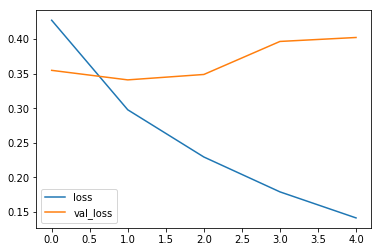

In [48]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

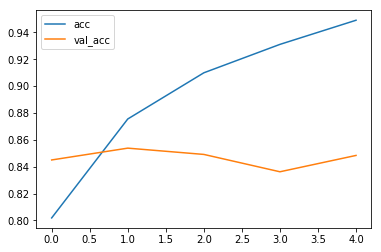

In [49]:
# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()